<div style="background-color:#caeec2; padding:10px; border-radius:6px; color:black;" >

### 1.  Data Collection And Preparation
</div>

In [355]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Here, I am loading the dataset, and doing some initial cleaning.


</div>


In [356]:
# Loading the dataset
luke_hair_data = pd.read_csv('Data/luke_hair_loss_documentation.csv')

# Checking the structure of the dataset
print(luke_hair_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [357]:
luke_hair_data.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,3.0,NaN,1
1,2/01/2021,Few,0,Low,0,3,NaN,Low,Pantene,No,N,1.0,NaN,1
2,3/01/2021,Medium,3,Low,1,0,NaN,Low,Pantene,Yes,Y,2.0,NaN,2
3,4/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,N,3.0,NaN,3
4,5/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,1.0,NaN,2


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
The dataset contains no missing values. Entries that were labeled as missing for ‘school assessment’ and ‘dandruff’ were updated to ‘No Assessment’ and ‘None,’ respectively.


</div>


In [358]:
luke_hair_data.columns = luke_hair_data.columns.str.strip()
luke_hair_data.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in luke_hair_data.columns]
print(luke_hair_data.columns)

Index(['Date', 'Hair_Loss', 'Stay_Up_Late', 'Pressure_Level',
       'Coffee_Consumed', 'Brain_Working_Duration', 'School_Assesssment',
       'Stress_Level', 'Shampoo_Brand', 'Swimming', 'Hair_Washing',
       'Hair_Grease', 'Dandruff', 'Libido'],
      dtype='object')


In [359]:
# Saving as csv
luke_hair_data.to_csv('Data/Luke_hair_loss_documentation Raw.csv', index=False)
print(luke_hair_data.isnull().sum())

Date                        0
Hair_Loss                   0
Stay_Up_Late                0
Pressure_Level              0
Coffee_Consumed             0
Brain_Working_Duration      0
School_Assesssment        305
Stress_Level                0
Shampoo_Brand               0
Swimming                    0
Hair_Washing                0
Hair_Grease                 4
Dandruff                  289
Libido                      0
dtype: int64


In [360]:
luke_hair_data['School_Assesssment'].replace(pd.NA, "No assessment" , inplace=True)
luke_hair_data['Dandruff'].replace(pd.NA, "None" , inplace=True)
luke_hair_data['Hair_Grease'].fillna(0, inplace=True)
print(luke_hair_data.isnull().sum())

Date                      0
Hair_Loss                 0
Stay_Up_Late              0
Pressure_Level            0
Coffee_Consumed           0
Brain_Working_Duration    0
School_Assesssment        0
Stress_Level              0
Shampoo_Brand             0
Swimming                  0
Hair_Washing              0
Hair_Grease               0
Dandruff                  0
Libido                    0
dtype: int64


In [361]:
# Standardize categorical values

# Hair_Washing: Y/N → Yes/No
luke_hair_data['Hair_Washing'] = luke_hair_data['Hair_Washing'].replace({'Y': 'Yes', 'N': 'No'})

# School_Assessment: abbreviations → full names
luke_hair_data['School_Assesssment'] = luke_hair_data['School_Assesssment'].replace({
    'Individual ass': 'Individual Assessment',
    'Team ass': 'Team Assessment'
})


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will provide the statistcal summaries of the key variables.


</div>


In [362]:
luke_hair_data.describe()

,Stay_Up_Late,Coffee_Consumed,Brain_Working_Duration,Hair_Grease,Libido
count,400.000000,400.000000,400.000000,400.00000,400.000000
mean,1.910000,1.162500,3.970000,2.54000,2.787500
std,1.611954,1.978859,4.215272,1.29522,1.822264
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,1.000000,2.00000,1.000000
50%,2.000000,0.000000,2.000000,2.00000,3.000000
75%,3.000000,1.000000,7.000000,4.00000,5.000000
max,8.000000,10.000000,18.000000,5.00000,5.000000


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >

#### Stay Up Late
- The dataset contains 400 entries.  
- On average, the individual scored 1.91 for staying up late, with a standard deviation of 1.61, indicating moderate variability in sleeping habits.  
- Values range from 0 to 8, showing that the individual rarely stays up late on some days and stays up late frequently on others.  

#### Coffee Consumed
- The mean coffee consumption is 1.16 units with a standard deviation of 1.98, suggesting high variability in intake.  
- Most days (50th percentile) have no coffee consumption, while on some days up to 10 units were consumed.  

#### Brain Working Duration
- The average brain working duration is 3.97 hours, with a standard deviation of 4.22, indicating considerable variation in daily work duration.  
- Values range from 0 to 18 hours, with a median of 2 hours.  

#### Hair Grease
- Hair greasing habits have a mean of 2.57 and a standard deviation of 1.28.  
- Values range from 1 to 5, showing that the individual used moderate levels of hair grease on most days.  

#### Libido
- The average libido score is 2.79 with a standard deviation of 1.82.  
- Scores range from 0 to 5, with a median of 3, indicating generally moderate levels across the recorded days.  


</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will be encoding some of the features.


</div>


In [363]:
print(luke_hair_data['Hair_Loss'].unique())
print(luke_hair_data['Pressure_Level'].unique())
print(luke_hair_data['School_Assesssment'].unique())
print(luke_hair_data['Stress_Level'].unique())
print(luke_hair_data['Swimming'].unique())
print(luke_hair_data['Hair_Washing'].unique())
print(luke_hair_data['Hair_Grease'].unique())
print(luke_hair_data['Dandruff'].unique())
print(luke_hair_data['Libido'].unique())



['Few' 'Medium' 'Many' 'A lot']
['Low' 'Medium' 'High' 'Very High']
['No assessment' 'Individual Assessment' 'Team Assessment'
 'Final exam revision' 'Final exam']
['Low' 'Medium' 'High' 'Very High']
['No' 'Yes']
['Yes' 'No']
[3. 1. 2. 4. 5. 0.]
['None' 'Few' 'Many']
[1 2 3 4 5 0]


In [364]:
luke_hair_data['Hair_Loss_Encoding'] = luke_hair_data['Hair_Loss'].map({'Few': 1, 'Medium': 2, 'Many': 3, 'A lot': 4 })
luke_hair_data['Pressure_Level_Encoding'] = luke_hair_data['Pressure_Level'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4 })
luke_hair_data['Stress_Level_Encoding'] = luke_hair_data['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4 })
luke_hair_data['Swimming_Encoding'] = luke_hair_data['Swimming'].map({'Yes': 1, 'No': 0})
luke_hair_data['Hair_Washing_Encoding'] = luke_hair_data['Hair_Washing'].map({'Yes': 1, 'No': 0})
luke_hair_data['Dandruff_Encoding'] = luke_hair_data['Dandruff'].map({'None': 0, 'Few': 1, 'Many': 2})


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Seeing the summary of the dataset, ther are some outliers in the data, especially in 'coffee_consumed' and 'brain_working_duration'. These outliers could potentially skew the analysis and may need to be addressed in the data cleaning process.


</div>


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Creating a correlation matrix


</div>


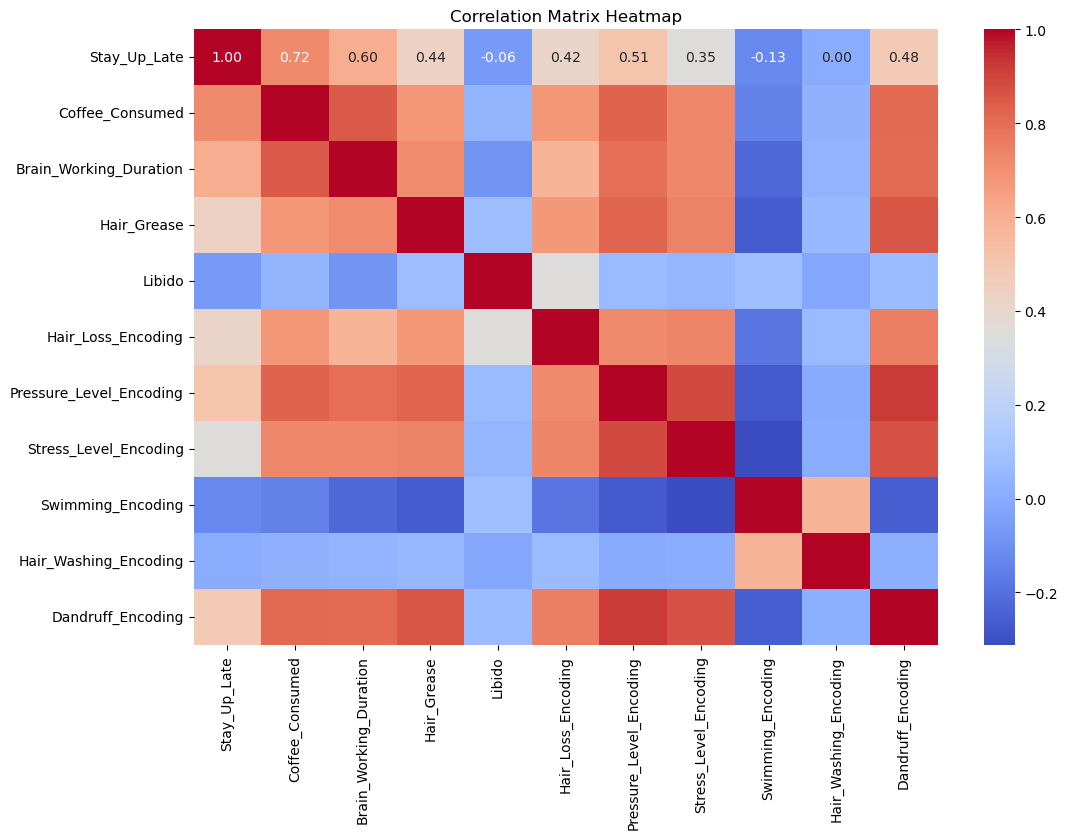

In [365]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
numerical_columns = luke_hair_data.select_dtypes(include=[np.number]).columns
correlation_matrix = luke_hair_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [366]:
print(luke_hair_data.head())

        Date Hair_Loss  Stay_Up_Late Pressure_Level  Coffee_Consumed  \
0  1/01/2021       Few             2            Low                0   
1  2/01/2021       Few             0            Low                0   
2  3/01/2021    Medium             3            Low                1   
3  4/01/2021       Few             2            Low                0   
4  5/01/2021       Few             2            Low                0   

   Brain_Working_Duration School_Assesssment Stress_Level Shampoo_Brand  \
0                       1      No assessment          Low       Pantene   
1                       3      No assessment          Low       Pantene   
2                       0      No assessment          Low       Pantene   
3                       1      No assessment          Low       Pantene   
4                       1      No assessment          Low       Pantene   

  Swimming Hair_Washing  Hair_Grease Dandruff  Libido  Hair_Loss_Encoding  \
0       No          Yes          3.0   

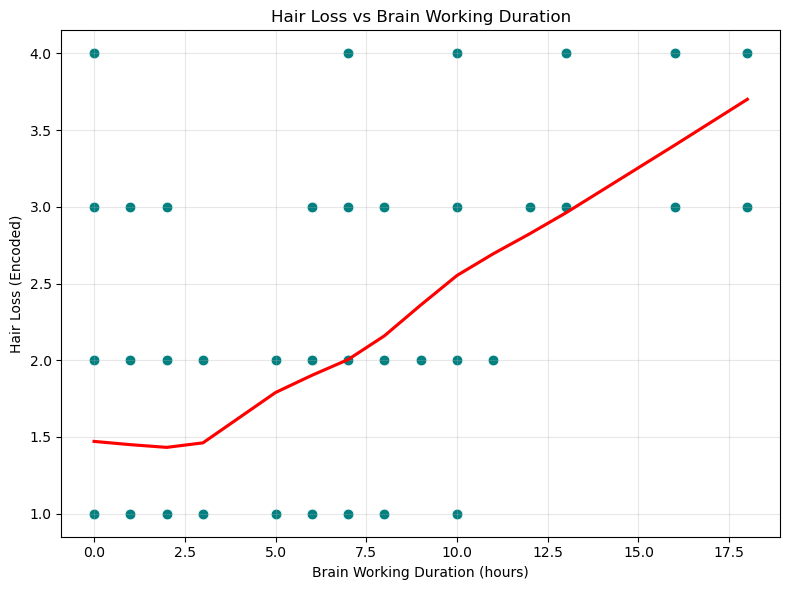

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# optional: sort by date if you want
df = luke_hair_data.sort_values('Date')

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Brain_Working_Duration', 
    y='Hair_Loss_Encoding', 
    data=df, 
    color='teal',
    s=60
)

sns.regplot(x='Brain_Working_Duration', y='Hair_Loss_Encoding', data=df, scatter=False, lowess=True, color='red')


plt.title('Hair Loss vs Brain Working Duration')
plt.xlabel('Brain Working Duration (hours)')
plt.ylabel('Hair Loss (Encoded)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Axes: xlabel='Brain_Working_Duration', ylabel='Hair_Loss_Encoding'>

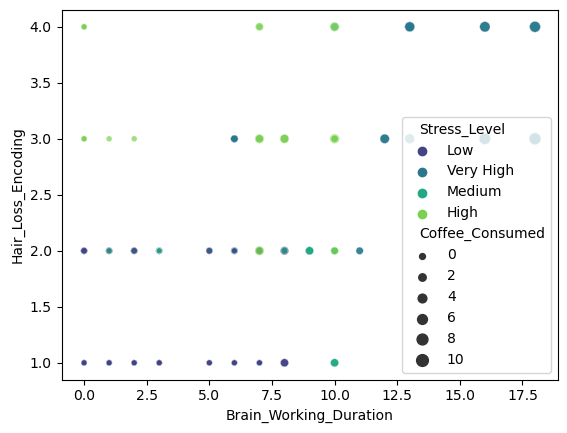

In [368]:
sns.scatterplot(
    # x='Brain_Working_Duration', 
    x='Brain_Working_Duration', 
    y='Hair_Loss_Encoding', 
    data=df,
    size='Coffee_Consumed',        # optional: color by another categorical variable
    hue='Stress_Level',    # optional: size of points by another variable
    palette='viridis',
    alpha=0.7
)


<Axes: xlabel='Hair_Loss', ylabel='Coffee_Consumed'>

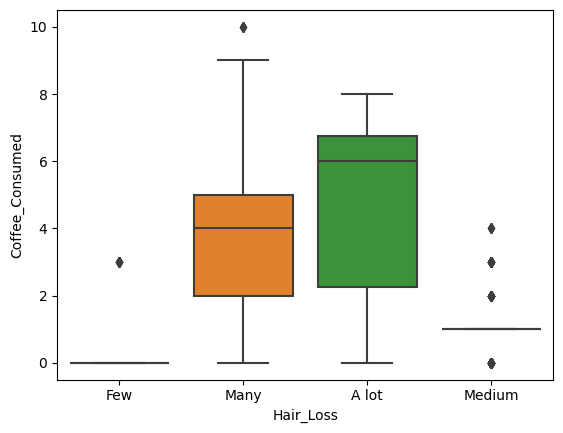

In [369]:
sns.boxplot(x='Hair_Loss', y='Coffee_Consumed', data=df)

<Axes: xlabel='Stress_Level', ylabel='count'>

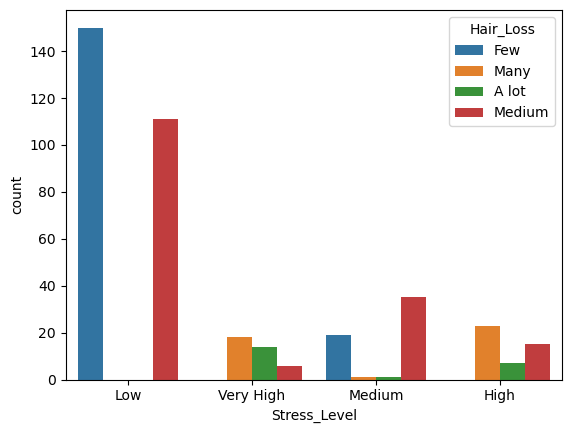

In [370]:
sns.countplot(x='Stress_Level', hue='Hair_Loss', data=df)
# sns.violinplot(x='Pressure_Level', y='Hair_Loss_Encoding', data=df)


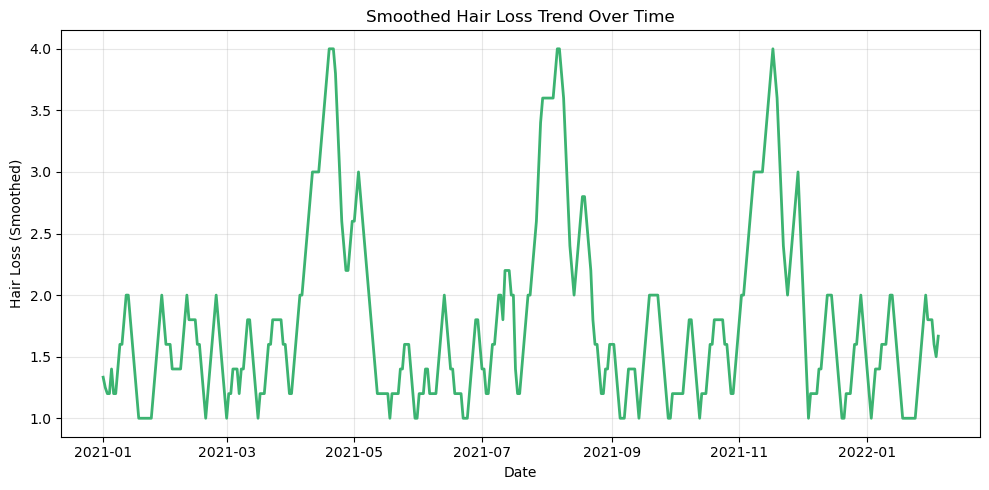

In [371]:
import pandas as pd
import matplotlib.pyplot as plt

# convert Date column to datetime
luke_hair_data['Date'] = pd.to_datetime(luke_hair_data['Date'], format='%d/%m/%Y')

df = luke_hair_data.sort_values('Date')

# apply rolling average to smooth the Hair_Loss_Encoding values
df['Smoothed_Hair_Loss'] = df['Hair_Loss_Encoding'].rolling(window=5, center=True, min_periods=1).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Smoothed_Hair_Loss'], color='mediumseagreen', linewidth=2)
plt.title('Smoothed Hair Loss Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Hair Loss (Smoothed)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Axes: xlabel='Hair_Loss', ylabel='count'>

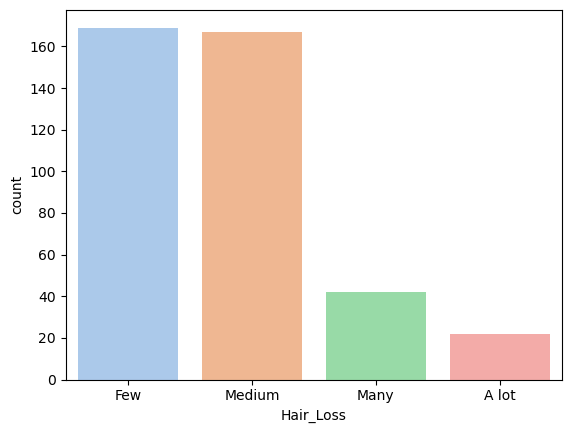

In [372]:
sns.countplot(x='Hair_Loss', data=df, palette='pastel')
# In about the datasets page

<Axes: xlabel='Stress_Level', ylabel='Hair_Loss_Encoding'>

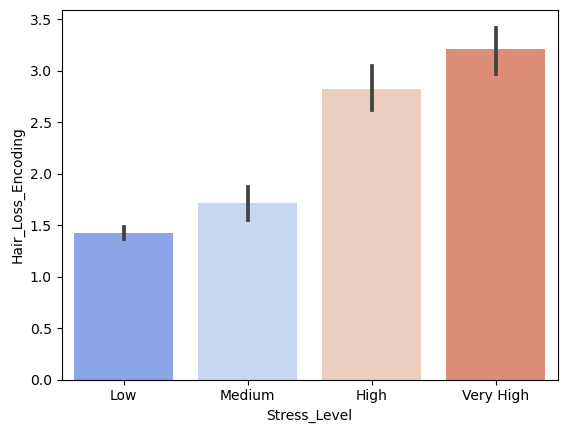

In [373]:
sns.barplot(x='Stress_Level', y='Hair_Loss_Encoding', data=df, palette='coolwarm')
# sns.barplot(x='Coffee_Consumed', y='Hair_Loss_Encoding', data=df, palette='coolwarm')


In [374]:
# %%
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.interpolate import make_interp_spline

# %%
# Prepare dataset
df = luke_hair_data.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values('Date')

# Choose third variable
third_var = 'Coffee_Consumed'  # change to Brain_Working_Duration, Stress_Level_Encoding, etc.

# %%
# --- Automatic Min-Max Scaling ---
scaled_var = third_var + '_scaled'
df[scaled_var] = (df[third_var] - df[third_var].min()) / (df[third_var].max() - df[third_var].min())

# %%
# Option 1: Color-coded scatter plot
fig1 = px.scatter(
    df,
    x='Date',
    y='Hair_Loss_Encoding',
    color=scaled_var,                      # scaled variable for color
    color_continuous_scale='Viridis',      # smooth gradient
    hover_data=['Hair_Loss', 'Brain_Working_Duration', 'Stress_Level'],
    title=f'Scatter Plot of Hair Loss vs Date colored by {third_var} (scaled)'
)
fig1.show()


# %%
# Option 3: Bubble chart (size = scaled third variable)
fig3 = px.scatter(
    df,
    x='Date',
    y='Hair_Loss_Encoding',
    size=scaled_var,                        # size proportional to scaled variable
    color=scaled_var,                       # color gradient
    color_continuous_scale='Viridis',
    hover_data=['Hair_Loss', 'Brain_Working_Duration', 'Stress_Level'],
    title=f'Bubble Chart of Hair Loss vs Date with {third_var} as Size & Color (scaled)'
)
fig3.show()

# %%
# Option 4: 3D scatter plot
fig4 = px.scatter_3d(
    df,
    x='Date',
    y='Hair_Loss_Encoding',
    z=scaled_var,
    color=scaled_var,
    color_continuous_scale='Viridis',
    hover_data=['Hair_Loss', 'Brain_Working_Duration', 'Stress_Level'],
    title=f'3D Scatter Plot: Hair Loss vs Date vs {third_var} (scaled)'
)
fig4.show()



/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [375]:
print(luke_hair_data.columns)

Index(['Date', 'Hair_Loss', 'Stay_Up_Late', 'Pressure_Level',
       'Coffee_Consumed', 'Brain_Working_Duration', 'School_Assesssment',
       'Stress_Level', 'Shampoo_Brand', 'Swimming', 'Hair_Washing',
       'Hair_Grease', 'Dandruff', 'Libido', 'Hair_Loss_Encoding',
       'Pressure_Level_Encoding', 'Stress_Level_Encoding', 'Swimming_Encoding',
       'Hair_Washing_Encoding', 'Dandruff_Encoding'],
      dtype='object')


In [376]:
# Saving as csv
luke_hair_data.to_csv('Data/Luke_hair_loss_documentation Cleaned.csv', index=False)